In [1]:
import fastbook
from fastai import *
from fastbook import *
from fastai.vision.all import *
from fastai.vision.widgets import *
import os


In [2]:
os.getcwd()
os.path.join(os.getcwd(),'images')

'/home/aldrin/code/python-stuff/images'

In [3]:
path=os.path.join(os.getcwd(), 'images')
dls = ImageDataLoaders.from_folder(path,item_tfms=Resize(128),batch_tfms=aug_transforms(),valid_pct=0.2, seed=23, bs=16)
dls.valid_ds.items[:3]

[Path('/home/aldrin/code/python-stuff/images/Edwin/frame_24.jpg'),
 Path('/home/aldrin/code/python-stuff/images/Edwin/frame_40.jpg'),
 Path('/home/aldrin/code/python-stuff/images/Aldrin/frame_48.jpg')]

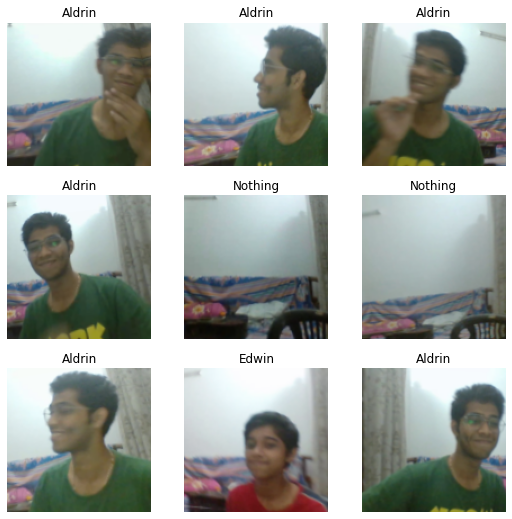

In [4]:
dls.show_batch()

In [24]:
learn = vision_learner(dls, resnet34, metrics=accuracy)
learn.fine_tune(5)

epoch,train_loss,valid_loss,accuracy,time
0,1.716112,0.219596,0.888889,00:02


epoch,train_loss,valid_loss,accuracy,time
0,0.303623,0.028430,1.000000,00:02
1,0.239682,0.002027,1.000000,00:02
2,0.171572,0.000198,1.000000,00:02
3,0.134572,0.000066,1.000000,00:02
4,0.105927,0.000059,1.000000,00:02


In [25]:
interp=ClassificationInterpretation.from_learner(learn)
# interp.plot_confusion_matrix()

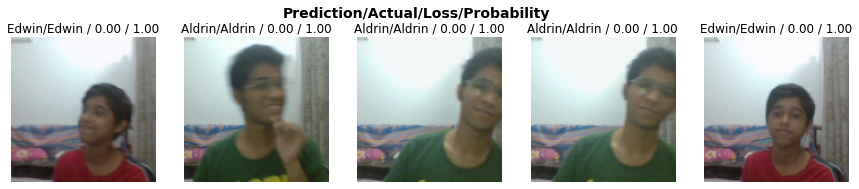

In [26]:
interp.plot_top_losses(5, nrows=1)

cleaner = ImageClassifierCleaner(learn)
cleaner

In [19]:
cleaner = ImageClassifierCleaner(learn)
cleaner

In [53]:
deleteFromCleaner()
moveFromCleaner()

1  files deleted
0  files moved


In [41]:
def deleteFromCleaner(): 
    deletedFiles = []
    for idx in cleaner.delete(): 
        try:
            cleaner.fns[idx].unlink()
            deletedFiles.append((cleaner.fns[idx],idx))
    #         print('deleted ' , idx)
        except:
            print("error")
    print(len(deletedFiles), " files deleted")

In [42]:
def moveFromCleaner():
    movedFiles = []
    for idx,cat in cleaner.change(): 
        target=path+'/'+cat
        try: 
            shutil.move(str(cleaner.fns[idx]), target)
    #         print("moved ", idx)
            movedFiles.append((cleaner.fns[idx], idx))
        except FileNotFoundError:
            print('File not found error')
    print(len(movedFiles), " files moved")

In [31]:
uploader = widgets.FileUpload()
uploader

FileUpload(value={}, description='Upload')

In [32]:
img = PILImage.create(uploader.data[0])
actor,s,probs = learn.predict(img)
print(actor, s, probs)
print(f"AI says that this is: {actor}.")
print(f"Probability it's {actor}: {probs[1].item():.6f}")

Aldrin TensorBase(0) TensorBase([1.0000e+00, 1.8079e-06, 2.5012e-06])
AI says that this is: Aldrin.
Probability it's Aldrin: 0.000002


In [67]:
cwd=os.getcwd()
print(cwd)
learnPath=Path(cwd)
print(learnPath)
learn.path=learnPath

/home/aldrin/code/learn/fastbook/workspace/HarryPotterStuff
/home/aldrin/code/learn/fastbook/workspace/HarryPotterStuff


FileNotFoundError: [Errno 2] No such file or directory: '/home/aldrin/code/learn/fastbook/workspace/HarryPotterStuff/export.pkl'

In [68]:
learn.export()


In [69]:
path = Path()
path.ls(file_exts='.pkl')

(#1) [Path('export.pkl')]

In [26]:
learn_inf = load_learner('export.pkl')

In [27]:
uploader = widgets.FileUpload()
uploader

FileUpload(value={}, description='Upload')

In [30]:
img = PILImage.create(uploader.data[0])
actor,_,probs = learn_inf.predict(img)
print(f"AI says that this is: {actor}.")
print(f"Probability it's {actor}: {probs[1].item():.6f}")

AI says that this is: Luna Lovegood.
Probability it's Luna Lovegood: 0.076161


In [92]:
img = PILImage.create(uploader.data[0])
learn_inf.predict(img)

('Prithviraj',
 TensorBase(3),
 TensorBase([6.5093e-04, 9.4286e-05, 4.7073e-05, 9.9921e-01]))

In [12]:
learn_inf.dls.vocab

NameError: name 'learn_inf' is not defined